**I aim to compare Run 3 (2022) and Run 2 (2018) DYJets samples.**

In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
import uproot
import awkward as ak
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../analysisTools/")
import plotTools as ptools
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**The files and the variables.**

In [5]:
#Run 3 
bk2022 = uproot.open("/uscms/home/reshmar/nobackup/CMSSW_13_0_13/src/iDMe/AODSkimmer/Final_DYJets_2022_output.root")
tree2022 = bk2022['ntuples/outT']   #tree2022 is a dictionary. It has 366 keys aka branches.
print (tree2022.keys())

['trigFired', 'eventNum', 'lumiSec', 'runNum', 'trig_HLT_PFMET110_PFMHT110_IDTight', 'trig_HLT_PFMET120_PFMHT120_IDTight', 'trig_HLT_PFMET130_PFMHT130_IDTight', 'trig_HLT_PFMET140_PFMHT140_IDTight', 'trig_HLT_PFMETTypeOne110_PFMHT110_IDTight', 'trig_HLT_PFMETTypeOne120_PFMHT120_IDTight', 'trig_HLT_PFMETTypeOne130_PFMHT130_IDTight', 'trig_HLT_PFMETTypeOne140_PFMHT140_IDTight', 'trig_HLT_PFJet15', 'trig_HLT_PFJet25', 'trig_HLT_PFJet40', 'trig_HLT_PFJet60', 'trig_HLT_PFJet80', 'trig_HLT_PFJet140', 'trig_HLT_PFJet200', 'trig_HLT_PFJet260', 'trig_HLT_PFJet320', 'trig_HLT_PFJet400', 'trig_HLT_PFJet450', 'trig_HLT_PFJet500', 'trig_HLT_PFJet550', 'trig_HLT_AK4PFJet30', 'trig_HLT_AK4PFJet50', 'trig_HLT_AK4PFJet80', 'trig_HLT_AK4PFJet100', 'trig_HLT_AK4PFJet120', 'trig_HLT_Ele50_CaloIdVT_GsfTrkIdT_PFJet165', 'trig_HLT_Ele15_CaloIdL_TrackIdL_IsoVL_PFJet30', 'trig_HLT_Ele17_WPLoose_Gsf', 'trig_HLT_Ele35_WPTight_Gsf_L1EGMT', 'trig_HLT_Ele27_WPTight_Gsf', 'trig_HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL

In [25]:
#The variables


vtxvxy2022 = tree2022["vtx_vxy"].array()
print (type(vtxvxy2022))  #Awkward jagged (irregular) array
flat_vtxvxy2022 = ak.flatten(vtxvxy2022)


vtxpt2022 = tree2022["vtx_pt"].array()
print (type(vtxpt2022))  #Awkward jagged (irregular) array
flat_vtxpt2022 = ak.flatten(vtxpt2022)


vtxMETdPhi2022 = tree2022["vtx_METdPhi"].array()
print (type(vtxMETdPhi2022))  #Awkward jagged (irregular) array
flat_vtxMETdPhi2022 = ak.flatten(vtxMETdPhi2022)


vtxdR2022 = tree2022["vtx_dR"].array()
print (type(vtxdR2022))  #Awkward jagged (irregular) array
flat_vtxdR2022 = ak.flatten(vtxdR2022)


vtxm2022 = tree2022["vtx_m"].array()
print (type(vtxm2022))  #Awkward jagged (irregular) array
flat_vtxm2022 = ak.flatten(vtxm2022)




vtx_sign2022 = tree2022["vtx_sign"].array()
flat_vtx_sign2022 = ak.flatten(vtx_sign2022)


vtx_minDxy2022 = tree2022["vtx_minDxy"].array()
flat_vtx_minDxy2022 = ak.flatten(vtx_minDxy2022)


vtx_dPhiJets2022 = tree2022["vtx_dPhiJets"].array()
flat_vtx_dPhiJets2022 = ak.flatten(vtx_dPhiJets2022)

print (flat_vtx_dPhiJets2022)






LptElectron_pt2022 = tree2022["LptElectron_pt"].array()
#print (type(vtx_re2018))  #Awkward jagged (irregular) array
flat_LptElectron_pt2022 = ak.flatten(LptElectron_pt2022)

LptElectron_eta2022 = tree2022["LptElectron_eta"].array()
#print (type(LptElectron_eta2018))  #Awkward jagged (irregular) array
flat_LptElectron_eta2022 = ak.flatten(LptElectron_eta2022)

LptElectron_vxy2022 = tree2022["LptElectron_vxy"].array()
#print (type(vtx_reduced_chi22018))  #Awkward jagged (irregular) array
flat_LptElectron_vxy2022 = ak.flatten(LptElectron_vxy2022)

<class 'awkward.highlevel.Array'>
<class 'awkward.highlevel.Array'>
<class 'awkward.highlevel.Array'>
<class 'awkward.highlevel.Array'>
<class 'awkward.highlevel.Array'>
[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]


In [24]:
#Run 2
bk2018 = uproot.open("/uscms/home/reshmar/nobackup/CMSSW_13_0_13/src/iDMe/AODSkimmer/2018_DYJets_output.root")
tree2018 = bk2018['ntuples/outT']   #tree2018 is a dictionary. 

#The variables
vtxvxy2018 = tree2018["vtx_vxy"].array()
print (type(vtxvxy2018))  #Awkward jagged (irregular) array
flat_vtxvxy2018 = ak.flatten(vtxvxy2018)



vtxpt2018 = tree2018["vtx_pt"].array()
print (type(vtxpt2018))  #Awkward jagged (irregular) array
flat_vtxpt2018 = ak.flatten(vtxpt2018)


vtxMETdPhi2018 = tree2018["vtx_METdPhi"].array()
print (type(vtxMETdPhi2018))  #Awkward jagged (irregular) array
flat_vtxMETdPhi2018 = ak.flatten(vtxMETdPhi2018)


vtxdR2018 = tree2018["vtx_dR"].array()
print (type(vtxdR2018))  #Awkward jagged (irregular) array
flat_vtxdR2018 = ak.flatten(vtxdR2018)


vtxm2018 = tree2018["vtx_m"].array()
print (type(vtxm2018))  #Awkward jagged (irregular) array
flat_vtxm2018 = ak.flatten(vtxm2018)


vtx_reduced_chi22018 = tree2018["vtx_reduced_chi2"].array()
print (type(vtx_reduced_chi22018))  #Awkward jagged (irregular) array
flat_vtx_reduced_chi22018 = ak.flatten(vtx_reduced_chi22018)


vtx_sign2018 = tree2018["vtx_sign"].array()
flat_vtx_sign2018 = ak.flatten(vtx_sign2018)


vtx_minDxy2018 = tree2022["vtx_minDxy"].array()
flat_vtx_minDxy2018 = ak.flatten(vtx_minDxy2018)
print (flat_vtx_minDxy2018)


vtx_dPhiJets2018 = tree2018["vtx_dPhiJets"].array()
flat_vtx_dPhiJets2018 = ak.flatten(vtx_dPhiJets2018)

print (flat_vtx_dPhiJets2018)







LptElectron_pt2018 = tree2018["LptElectron_pt"].array()
#print (type(vtx_re2018))  #Awkward jagged (irregular) array
flat_LptElectron_pt2018 = ak.flatten(LptElectron_pt2018)

LptElectron_eta2018 = tree2018["LptElectron_eta"].array()
#print (type(LptElectron_eta2018))  #Awkward jagged (irregular) array
flat_LptElectron_eta2018 = ak.flatten(LptElectron_eta2018)

LptElectron_vxy2018 = tree2018["LptElectron_vxy"].array()
#print (type(vtx_reduced_chi22018))  #Awkward jagged (irregular) array
flat_LptElectron_vxy2018 = ak.flatten(LptElectron_vxy2018)

<class 'awkward.highlevel.Array'>
<class 'awkward.highlevel.Array'>
<class 'awkward.highlevel.Array'>
<class 'awkward.highlevel.Array'>
<class 'awkward.highlevel.Array'>
<class 'awkward.highlevel.Array'>
[0.00123, 0.00399, 0.000658, 0.000658, ... 0.000793, 0.00258, 0.00145, 9.29e-05]
[[2.21, -1.98], [3.09, 2.42], [-0.201, ... -0.515], [2.79, -0.517], [2.76, -0.547]]


Clearly, vtxvxy is an Awkward jagged (or say irregular) array. Since matplotlib expects only flat arrays, I had to flatten it.

**Histograms**

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

plt.hist(flat_vtxMETdPhi2022, bins=50,range = [-5,5], histtype='step', color='r',label='Run3')
plt.hist(flat_vtxMETdPhi2018, bins=50,range = [-5,5], histtype='step', color='b',label='Run2')

plt.title('')
plt.xlabel("vtx_METdPhi")

plt.legend()

plt.savefig('vtx_METdPhi.png', format='png', dpi=300)

plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

plt.hist(flat_vtxdR2022, bins=50, range=[0,6],histtype='step', color='r',label='Run3')
plt.hist(flat_vtxdR2018, bins=50, range=[0,6],histtype='step', color='b',label='Run2')


plt.title('')
plt.xlabel("vtx_dR (in radians)")

plt.legend()
plt.savefig('vtx_dR.png', format='png', dpi=300)

plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

plt.hist(flat_vtxvxy2022, bins=50, range=[0,6],histtype='step', color='r',label='Run3')
plt.hist(flat_vtxvxy2018, bins=50, range=[0,6],histtype='step', color='b',label='Run2')
plt.title('')
plt.xlabel("vtx_vxy (in cm)")

plt.legend()

plt.savefig('vtx_vxy.png', format='png', dpi=300)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

plt.hist(flat_vtxpt2022, bins=50, histtype='step', color='r',label='Run3')
plt.hist(flat_vtxpt2018, bins=50, histtype='step', color='b',label='Run2')
plt.title('')
plt.xlabel("vtx_pt (in GeV)")

plt.legend()

plt.savefig('vtx_pt.png', format='png', dpi=300)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

plt.hist(flat_vtxm2022, bins=50, histtype='step', color='r',label='Run3')
plt.hist(flat_vtxm2018, bins=50, histtype='step', color='b',label='Run2')

plt.title('')
plt.xlabel("vtx_m (in GeV)")

plt.legend()
plt.savefig('vtx_m.png', format='png', dpi=300)

plt.show()


In [ ]:
#Correction needed.
fig, ax = plt.subplots(figsize=(7,7))

plt.hist(flat_vtx_reduced_chi22022, bins=50, histtype='step', color='r',label='Run3')
plt.hist(flat_vtx_reduced_chi22018, bins=50, histtype='step', color='b',label='Run2')

plt.title('')
plt.xlabel("vtx_reduced_chi2 ")

plt.legend()
plt.savefig('vtx_reduced_chi2.png', format='png', dpi=300)

plt.show()







ValueError: in ListOffsetArray64, cannot convert to RegularArray because subarray lengths are not regular

(https://github.com/scikit-hep/awkward-1.0/blob/1.10.3/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

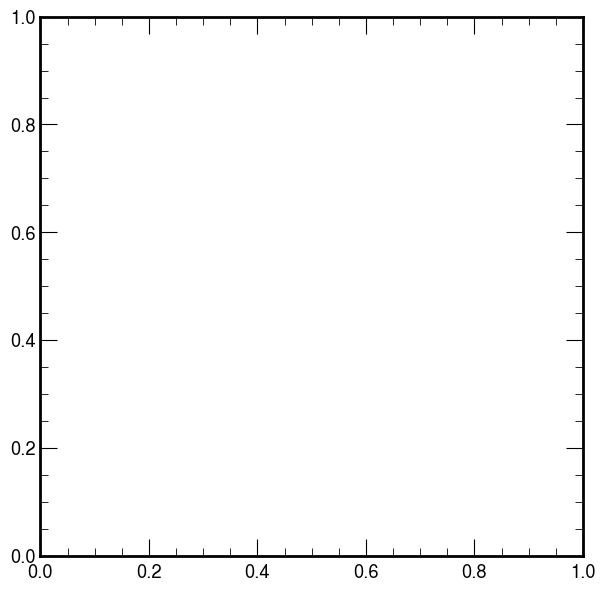

In [23]:
fig, ax = plt.subplots(figsize=(7,7))

#plt.hist(flat_vtx_dPhiJets2022, bins=50, histtype='step', color='r',label='Run3')
plt.hist(flat_vtx_dPhiJets2018, bins=50, histtype='step', color='b',label='Run2')

plt.title('')
plt.xlabel("vtx_dPhiJets")

plt.legend()
plt.savefig('vtx_dPhiJets.png', format='png', dpi=300)

plt.show()



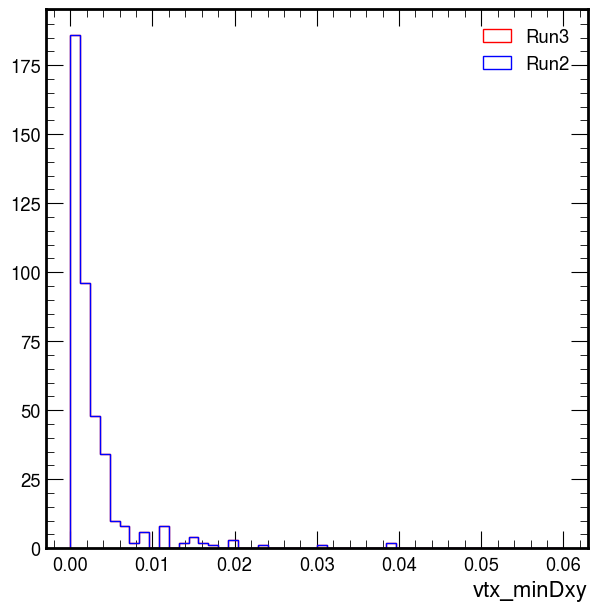

In [19]:
fig, ax = plt.subplots(figsize=(7,7))

plt.hist(flat_vtx_minDxy2022, bins=50,range =[0,0.060], histtype='step', color='r',label='Run3')
plt.hist(flat_vtx_minDxy2018, bins=50,range = [0,0.060], histtype='step', color='b',label='Run2')

plt.title('')
plt.xlabel("vtx_minDxy")

plt.legend()
plt.savefig('vtx_minDxy.png', format='png', dpi=300)

plt.show()


In [ ]:
#Run 3 
bk2022 = uproot.open("/uscms/home/reshmar/nobackup/CMSSW_13_0_13/src/iDMe/AODSkimmer/Final_DYJets_2022_output.root")
tree2022 = bk2022['ntuples/outT']   #tree2022 is a dictionary. It has 366 keys aka branches.

LptElectron_pt2022 = tree2022["LptElectron_pt"].array()
#print (type(vtx_re2018))  #Awkward jagged (irregular) array
flat_LptElectron_pt2022 = ak.flatten(LptElectron_pt2022)

LptElectron_eta2022 = tree2022["LptElectron_eta"].array()
#print (type(LptElectron_eta2018))  #Awkward jagged (irregular) array
flat_LptElectron_eta2022 = ak.flatten(LptElectron_eta2022)

LptElectron_vxy2022 = tree2022["LptElectron_vxy"].array()
#print (type(vtx_reduced_chi22018))  #Awkward jagged (irregular) array
flat_LptElectron_vxy2022 = ak.flatten(LptElectron_vxy2022)


LptElectron_vxy2022 = tree2022["LptElectron_vxy"].array()
#print (type(vtx_reduced_chi22018))  #Awkward jagged (irregular) array
flat_LptElectron_vxy2022 = ak.flatten(LptElectron_vxy2022)

LptElectron_charge2022 = tree2022["LptElectron_charge"].array()
#print (type(vtx_reduced_chi22018))  #Awkward jagged (irregular) array
flat_LptElectron_charge2022 = ak.flatten(LptElectron_charge2022)


LptElectron_e2022 = tree2022["LptElectron_e"].array()
#print (type(vtx_reduced_chi22018))  #Awkward jagged (irregular) array
flat_LptElectron_e2022 = ak.flatten(LptElectron_e2022)

LptElectron_dxy2022 = tree2022["LptElectron_dxy"].array()
#print (type(vtx_reduced_chi22018))  #Awkward jagged (irregular) array
flat_LptElectron_dxy2022 = ak.flatten(LptElectron_dxy2022)






#Run 2
bk2018 = uproot.open("/uscms/home/reshmar/nobackup/CMSSW_13_0_13/src/iDMe/AODSkimmer/2018_DYJets_output.root")
tree2018 = bk2018['ntuples/outT']   #tree2018 is a dictionary. 

LptElectron_pt2018 = tree2018["LptElectron_pt"].array()
#print (type(vtx_re2018))  #Awkward jagged (irregular) array
flat_LptElectron_pt2018 = ak.flatten(LptElectron_pt2018)

LptElectron_eta2018 = tree2018["LptElectron_eta"].array()
#print (type(LptElectron_eta2018))  #Awkward jagged (irregular) array
flat_LptElectron_eta2018 = ak.flatten(LptElectron_eta2018)

LptElectron_vxy2018 = tree2018["LptElectron_vxy"].array()
#print (type(vtx_reduced_chi22018))  #Awkward jagged (irregular) array
flat_LptElectron_vxy2018 = ak.flatten(LptElectron_vxy2018)


LptElectron_charge2018 = tree2018["LptElectron_charge"].array()
#print (type(vtx_reduced_chi22018))  #Awkward jagged (irregular) array
flat_LptElectron_charge2018 = ak.flatten(LptElectron_charge2018)


LptElectron_e2018 = tree2018["LptElectron_e"].array()
#print (type(vtx_reduced_chi22018))  #Awkward jagged (irregular) array
flat_LptElectron_e2018 = ak.flatten(LptElectron_e2018)

LptElectron_dxy2018 = tree2018["LptElectron_dxy"].array()
#print (type(vtx_reduced_chi22018))  #Awkward jagged (irregular) array
flat_LptElectron_dxy2018 = ak.flatten(LptElectron_dxy2018)










In [ ]:
#Histograms for LowpTElectron
fig, ax = plt.subplots(figsize=(7,7))

plt.hist(flat_LptElectron_pt2022, bins=50, histtype='step', color='r',label='Run3')
plt.hist(flat_LptElectron_pt2018, bins=50, histtype='step', color='b',label='Run2')

plt.title('')
plt.xlabel("LptElectron_pt")

plt.legend()
plt.savefig('LptElectron_pt.png', format='png', dpi=300)

plt.show()


In [ ]:
#Histograms for LowpTElectron
fig, ax = plt.subplots(figsize=(7,7))

plt.hist(flat_LptElectron_pt2022, bins=50, histtype='step', color='r',label='Run3')
plt.hist(flat_LptElectron_pt2018, bins=50, histtype='step', color='b',label='Run2')

plt.title('')
plt.xlabel("LptElectron_pt")

plt.legend()
plt.savefig('LptElectron_pt.png', format='png', dpi=300)

plt.show()

In [ ]:
#Histograms for LowpTElectron
fig, ax = plt.subplots(figsize=(7,7))

plt.hist(flat_LptElectron_vxy2022, bins=50, range = [0,2.1], histtype='step', color='r',label='Run3')
plt.hist(flat_LptElectron_vxy2018, bins=50, range = [0,2.1], histtype='step', color='b',label='Run2')

plt.title('')
plt.xlabel("LptElectron_vxy")

plt.legend()
plt.savefig('LptElectron_vxy2022.png', format='png', dpi=300)

plt.show()

In [ ]:
#Histograms for LowpTElectron
fig, ax = plt.subplots(figsize=(7,7))

plt.hist(flat_LptElectron_eta2022, bins=50, histtype='step', color='r',label='Run3')
plt.hist(flat_LptElectron_eta2018, bins=50, histtype='step', color='b',label='Run2')

plt.title('')
plt.xlabel("LptElectron_eta")

plt.legend()
plt.savefig('LptElectron_eta.png', format='png', dpi=300)

plt.show()

In [ ]:
#Histograms for LowpTElectron
fig, ax = plt.subplots(figsize=(7,7))

plt.hist(flat_LptElectron_charge2022, bins=50, histtype='step', color='r',label='Run3')
plt.hist(flat_LptElectron_charge2018, bins=50, histtype='step', color='b',label='Run2')

plt.title('')
plt.xlabel("LptElectron_charge")

plt.legend()
plt.savefig('LptElectron_charge.png', format='png', dpi=300)

plt.show()

In [ ]:
#Histograms for LowpTElectron
fig, ax = plt.subplots(figsize=(7,7))

plt.hist(flat_LptElectron_e2022, bins=50, histtype='step', color='r',label='Run3')
plt.hist(flat_LptElectron_e2018, bins=50, histtype='step', color='b',label='Run2')

plt.title('')
plt.xlabel("LptElectron_e")

plt.legend()
plt.savefig('LptElectron_e.png', format='png', dpi=300)

plt.show()

In [ ]:
#Histograms for LowpTElectron
fig, ax = plt.subplots(figsize=(7,7))

plt.hist(flat_LptElectron_dxy2022, bins=50, histtype='step', color='r',label='Run3')
plt.hist(flat_LptElectron_dxy2018, bins=50, histtype='step', color='b',label='Run2')

plt.title('')
plt.xlabel("LptElectron_dxy")

plt.legend()
plt.savefig('LptElectron_dxy.png', format='png', dpi=300)

plt.show()